# Primera entrega ML

### Precio de la venta de vivienda en Barcelona

### Tema

El objetivo de este proyecto es predecir mediante el uso de diferentes parametros el precio de la vivienda en Barcelona.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro

from sklearn.preprocessing import LabelEncoder


# visualization
import seaborn as sns
import matplotlib.pyplot as plt


# Estandarizacion 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Modelos Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor


# Metricas
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import sys 
sys.path.append('../utils')
import funciones as func

import sys 
sys.path.append('../')
import train

In [2]:
# load dataset
datos = pd.read_csv('../data/processed/df_processed.cvs')
df = datos.copy()

In [3]:
df

,district,neighborhood,condition,type,rooms,area_m2,lift,views,floor,prices
0,1,45,0,2,3,351,1,0,0,2300000
1,9,14,0,2,5,298,1,0,10,1750000
2,1,12,0,4,2,90,1,0,14,590000
3,1,45,0,2,2,130,1,0,0,450000
4,3,0,0,7,3,110,0,0,17,430000
...,...,...,...,...,...,...,...,...,...,...
3260,2,61,1,2,1,64,1,0,0,295000
3261,0,17,1,2,3,99,0,0,7,420000
3262,4,50,1,2,4,127,1,0,11,545000
3263,7,37,1,2,3,64,0,0,18,170000


### Se divide el data set en X e y, la variable objetivo y las variables independientes, siendo 'y' la variable objetivo y 'X' las variables independientes.

### Se utilizarán todas las variables para calcular los modelos.

In [4]:
X = df.drop(['prices'], axis=1)
y = df['prices'].copy()

### Se usa el metodo de entrenamiento train test split donde se usara el  20% de entrenamiento.

In [5]:
X_train, X_test, y_train, y_test = train.tts(X,y)

# ESTANDARIZACION DE LOS DATOS

* Se usa el método MinMaxScaler para el escalado de los mismos

In [6]:
escalar = MinMaxScaler()
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

### Se utilizarán los modelos: 
* *'LinearRegresion', 'DecisionTree', 'RandomForest', 'KNeighbors', 'GaussianNB', 'SVR', 'GradientBoosting'* 

Para los que se aplicaran las métricas:
* *Mean Absolute Error ('MAE') y Mean Absolute Error ('RMSE')

##### Se obtienen los valores de las metricas así como los residuos para haya el calculo real de cual es el modelo que mejor predice el precio.

In [7]:
cv_metricas = pd.DataFrame
cv_residuo = pd.DataFrame
dic_residuos = {}
cv_metricas, cv_residuo, dic_residuos = train.modelos(X_train, X_test, y_train, y_test)

In [8]:
cv_metricas.sort_values(by='RMSE')

,MAE,RMSE,Modelos
2,134613.184105,335469.330379,RandomForest
0,176645.243346,373404.794973,Linear
3,184890.895355,378207.431514,KNeighbors
1,159309.007657,418693.136949,DecisionTree
4,349476.156202,583539.799197,GaussianNB
6,305953.970450,608809.797670,GradientBoosting
5,348060.020311,760205.355696,SVR


In [9]:
cv_residuo.sort_values(by='RMSE')

,Modelos,RMSE
2,RandomForest,8.790241e+07
1,DecisionTree,1.040288e+08
0,Linear,1.153493e+08
3,KNeighbors,1.207338e+08
6,GradientBoosting,1.997879e+08
5,SVR,2.272832e+08
4,GaussianNB,2.282079e+08


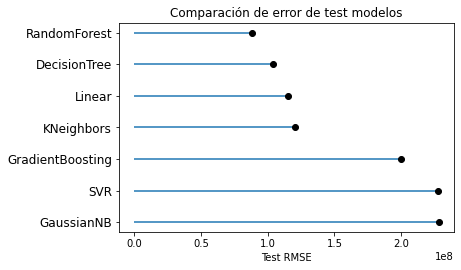

In [10]:
func.pintarResiduos(cv_residuo)

### Ordenadcion de variables por orden de correlación con variable objetivo

In [11]:
variables = df.corr().prices.sort_values().index.tolist()

In [12]:
variables.insert(0,variables.pop())
variables

['prices',
 'neighborhood',
 'condition',
 'views',
 'lift',
 'type',
 'district',
 'floor',
 'rooms',
 'area_m2']

#### Se entrenan los modelos quitando variable a variable por orden de importancia con la variable objetivo y se calcula:
 * Qué modelo es mejor para cada dataframe generado.

In [13]:
resultados = train.model_variables(df,variables)

In [14]:
resultados

{1:         Modelos          RMSE
 0  RandomForest  8.626565e+07,
 2:         Modelos          RMSE
 0  RandomForest  9.181592e+07,
 3:         Modelos          RMSE
 0  RandomForest  9.923970e+07,
 4:         Modelos          RMSE
 0  RandomForest  1.001037e+08,
 5:         Modelos          RMSE
 0  RandomForest  1.034456e+08,
 6:         Modelos          RMSE
 0  RandomForest  1.047964e+08,
 7:         Modelos          RMSE
 0  RandomForest  1.122011e+08,
 8:   Modelos          RMSE
 0  Linear  1.130514e+08,
 9:   Modelos          RMSE
 0     SVR  1.200708e+08}

## El  mejor modelo es el obtenido usando Random forest con todas las variables del dataframe

In [15]:
my_model = RandomForestRegressor()
my_model.fit(X_train,y_train)
my_model = my_model.predict(X_test)
print(mean_squared_error(y_test, my_model, squared=False))

335860.1768990504


#### Definición de parametros para el uso de GridSearch, se eligen estos pues son los que mejor resultado han dado tras realizar diferentes pruebas en la asignacion de valores a otros parametros.

In [16]:
parametros={ 'criterion' : ['squared_error', 'absolute_error', 'poisson'],
            'n_estimators': ( 10,20,30,50,70,100),
            'max_samples': (1/3,2/3)}

In [17]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Se utiliza GridSearch para intentar mejorar el resultado obtenido

In [18]:
grid=GridSearchCV(RandomForestRegressor(),
                    param_grid=parametros,
                    scoring='neg_root_mean_squared_error',
                    n_jobs=-1)
grid.fit(X_train,y_train)


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_samples': (0.3333333333333333,
                                         0.6666666666666666),
                         'n_estimators': (10, 20, 30, 50, 70, 100)},
             scoring='neg_root_mean_squared_error')

In [19]:
grid.best_estimator_

RandomForestRegressor(criterion='absolute_error',
                      max_samples=0.3333333333333333, n_estimators=20)

In [20]:
grid.best_score_

-324389.0266328744

In [21]:
pd.DataFrame(grid.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_samples,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
13,0.507642,0.010441,0.005186,0.000747,absolute_error,0.333333,20,"{'criterion': 'absolute_error', 'max_samples':...",-477458.805255,-299472.900128,-299324.145112,-251763.793280,-293925.489389,-324389.026633,78589.910795,1
22,4.274170,0.421000,0.022540,0.012812,absolute_error,0.666667,70,"{'criterion': 'absolute_error', 'max_samples':...",-465834.830589,-293101.591578,-316490.431364,-242975.159718,-307509.035554,-325182.209761,74777.286637,2
1,0.087167,0.004306,0.006583,0.002931,squared_error,0.333333,20,"{'criterion': 'squared_error', 'max_samples': ...",-467032.303045,-297326.917002,-327823.369744,-246087.257012,-301910.100804,-328035.989521,74379.062022,3
26,0.149001,0.016767,0.006782,0.000747,poisson,0.333333,30,"{'criterion': 'poisson', 'max_samples': 0.3333...",-466505.339580,-317115.794170,-295669.787903,-230183.690998,-336693.127589,-329233.548048,77438.272467,4
23,6.134196,0.411768,0.023737,0.006129,absolute_error,0.666667,100,"{'criterion': 'absolute_error', 'max_samples':...",-468372.360741,-298784.903472,-315110.796999,-240307.417319,-324128.800077,-329340.855722,75392.358837,5


#### Se puede observar como usando GridSearch el resultado mejora un poco

# Conclusión

Tras el analisis de todos los modelos expuesto y siendo GridSearch con random forest el mejor modelo, se concluye que no es un resultado suficientemente bueno como predecir el precio, es un resultado demasiado amplio para considerar usarlo. Más de 300.000€ de error no es lo suficientemente para ponerlo en producción.

Para mejorarlo se deberian tener mas variables de peso para la realizacion de un modelo mas fuerte.